---
authors: "Nadine Schulz, Quentin Huss, Christoffer Schröter"
date: "3.7.2023"
---

# Wellen- und Lagernachweis

Zuerst werden die benötigten Dateien und Module importiert.

In [1]:
from me2 import *
import numpy as np # Python Modul für numerische Mathematik

Warnung: Module 'cadquery' nicht gefunden. 3D Export ist nicht verfügbar.


In [2]:
#| include: false
Werkstoff.aus_datenbank_laden()

Um die Betriebsviskosität des verwendeten Öls zu ermitteln, benötigt man 2 bekannte Datenpunkte aus dem Viskositäts-Temperatur Diagramm. Die Nachfolgenden Listen enthalten für das jeweilige Öl diese 2 Punkte in der Form `[t1,nu1,t2,nu2]` und wurden dem Diagramm aus dem Übungsskript entnommen.

In [3]:
visk_10 = [4,76,32,10]
visk_15 = [4,91,54,10]
visk_22 = [4,105,84,10]
visk_32 = [4,115,128,10]
visk_46 = [4,124,260,10]
visk_68 = [5.1,120,300,16]
visk_100 = [6.5,120,300,22]
visk_150 = [9,120,300,29]
visk_220 = [11,120,300,35]
visk_320 = [14,120,300,41]
visk_460 = [18,120,300,47]
visk_680 = [22.5,120,300,55]
visk_1000 = [27.5,120,300,60]
visk_1500 = [35,120,300,66]

Öl = visk_1000

Die Variable `Öl` wird später an die Lagerklassen gegeben und kann hier global für alle Lager angepasst werden.

## Antriebswelle

Da die Absatzpositionen der Welle von der Lagerbreite abhängen (um die gegebenen Lagerabstände zu wahren) wird der Nachweis der Welle zusätzlich geführt. Im nachfolgenden Codeblock wird die Antriebswelle erzeugt und Geometrie sowie Kräfte zugewiesen. Die Ausgabe beinhaltet die ermittelten maximalen Verformungen und Neigungen der Welle, welche mit den zulässigen Verformungen aus der Norm abgeglichen werden können.

In [4]:
# Lagerpositionen
Festlager = 95
Loslager  = 310

B_fl = 20 # Breite Festlager
B_ll = 12 # Breite Loslager

Fr = -2404
Ft = 6207
Fa = -2259

geometrie = (
    (-30, 22),
     (30, 22),
     (60, 35),
     #Festlager
     (Festlager+B_fl/2,35),
     (Festlager+B_fl/2,36),
     (Festlager+B_fl/2+3, 36),
     (Loslager-B_ll/2,26),
     (Loslager-B_ll/2, 25),
     #Loslager
     (367, 25),
     (387, 16),
     (387, 15),
     (463, 15)
)

Antriebswelle = Welle("Antriebswelle",Festlager,Loslager,"42CrMo4","nein")
Antriebswelle.set_geometrie(geometrie)
# Kräfte aus z11
Antriebswelle.set_Kraft(Fr,"r",0,-38.31, 0)
Antriebswelle.set_Kraft(Ft,"t",0,-38.31, 0)
Antriebswelle.set_Kraft(Fa,"a",0,-38.31, 0)
Antriebswelle.lagerkräfte_berechnen()
Antriebswelle.verformung_berechnen()
print("Neigung FLx: ",np.rad2deg(Antriebswelle.NeigungFLx),"°")
print("Neigung FLy: ",np.rad2deg(Antriebswelle.NeigungFLy),"°")
print("Neigung LLx: ",np.rad2deg(Antriebswelle.NeigungLLx),"°")
print("Neigung LLy: ",np.rad2deg(Antriebswelle.NeigungLLy),"°")
print("\nMaximaler Verformungsgradient in X: ",Antriebswelle.maxVerf_x_PM,"mm/m")
print("Maximaler Verformungsgradient in Y: ",Antriebswelle.maxVerf_y_PM,"mm/m")
print("Maximale Verformung Ges: ",Antriebswelle.maxVerfPM_ges,"mm/m")

Neigung FLx:  0.005898812142012742 °
Neigung FLy:  -0.011392640496606024 °
Neigung LLx:  -0.004819142436407212 °
Neigung LLy:  0.00867375348272645 °

Maximaler Verformungsgradient in X:  0.19861999272007497 mm/m
Maximaler Verformungsgradient in Y:  0.02534793933579881 mm/m
Maximale Verformung Ges:  0.23415765828104745 mm/m


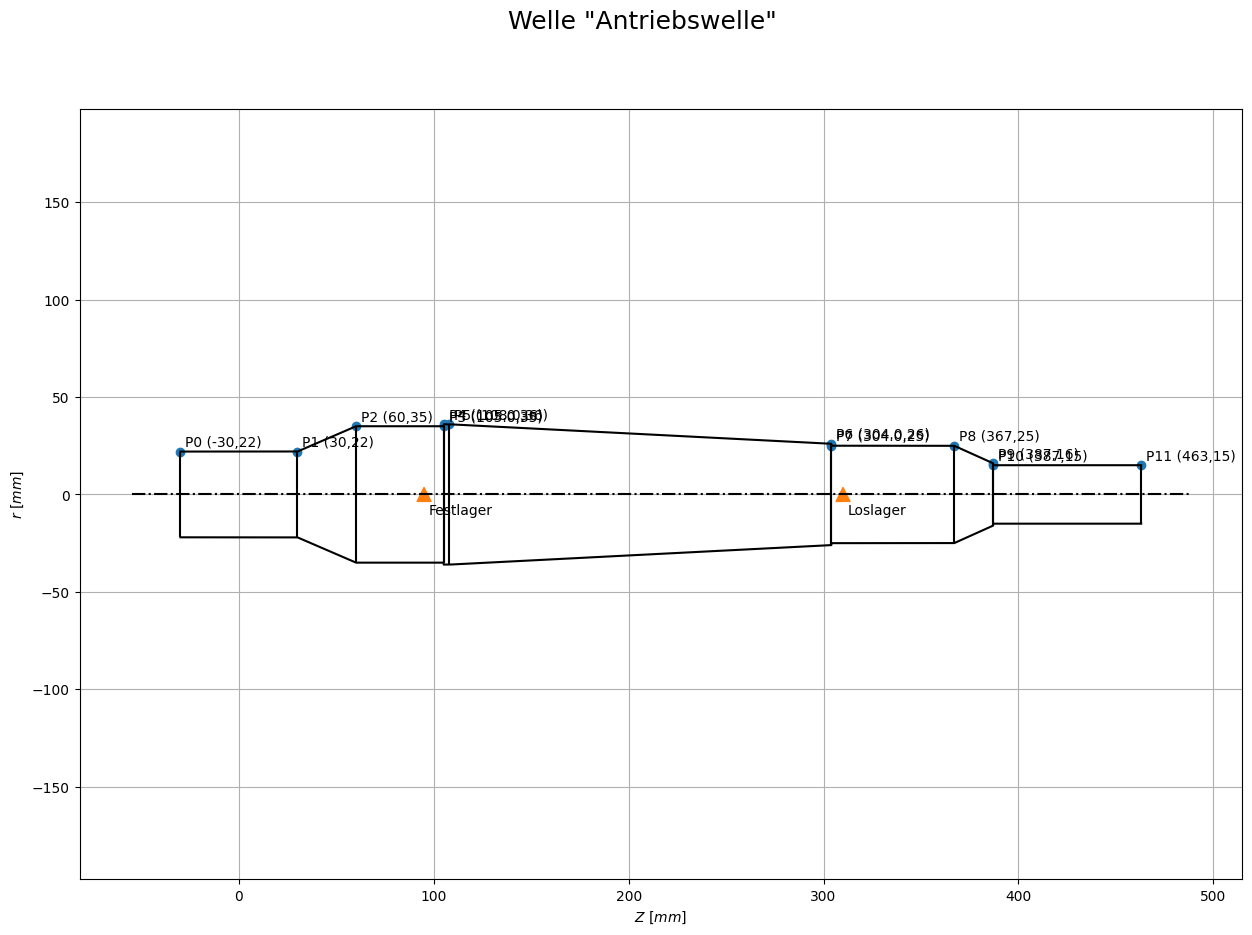

In [5]:
Antriebswelle.welle_darstellen()

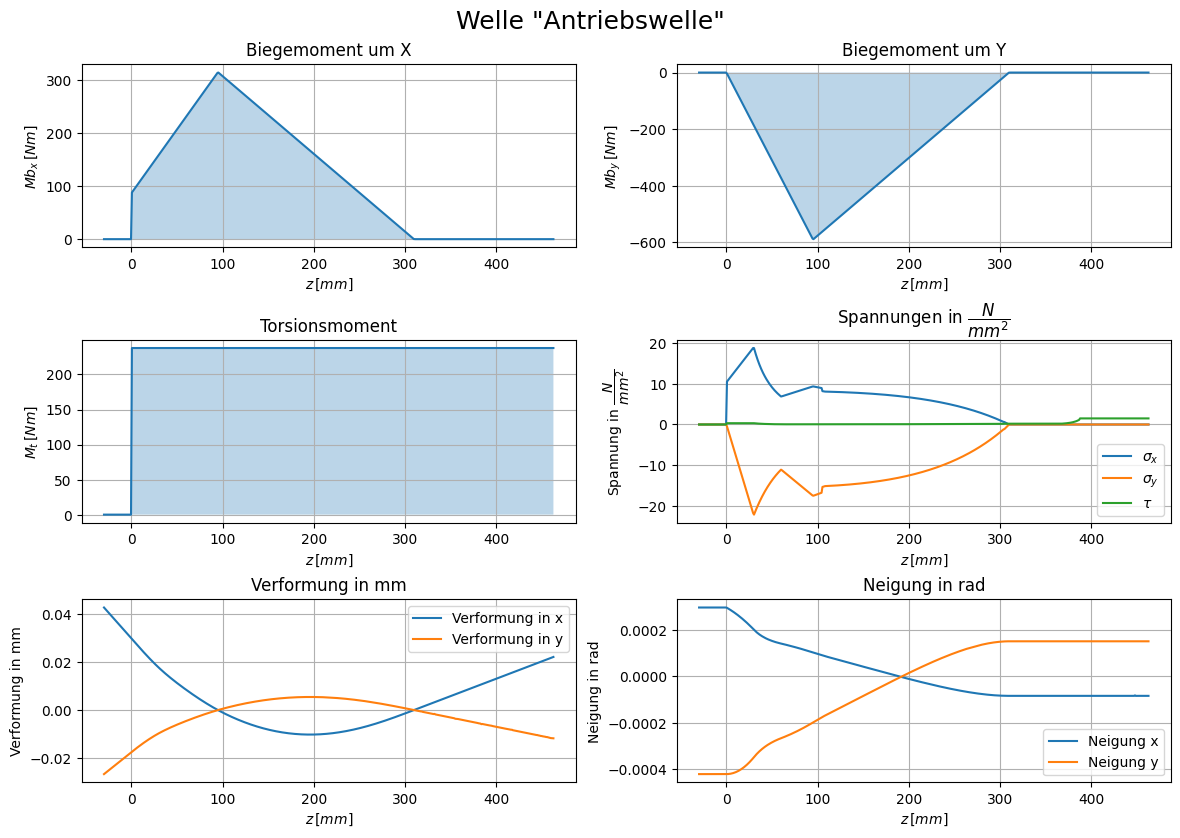

In [6]:
Antriebswelle.plots_alles()

### Absätze

Die Klasse `Welle_Absatz` wird mit folgenden Argumenten erzeugt:
- welle: Die Instanz der Klasse Welle auf der sich der Absatz befindet
- z: Z Koordinate des Absatzes auf der Welle
- art: Die Art des Nachweises
- Rz: Rauheit der Oberfläche
- *args: Zusätzliche Argumente. Bei art="Absatz" benötigt man z.B. den Radius der Rundung

In [7]:
z_pos = [geometrie[1][0],geometrie[3][0]]
Absätze = [Welle_Absatz(Antriebswelle,z,"Absatz",20,2) for z in z_pos]

Der Syntax `[Anweisung for variable in liste]` erzeugt eine Liste bei denen die Ergebnisse
der For-Schleife in der Liste gespeichert werden. Somit entsteht eine Liste mit so vielen Absätzen, wie es Z-Koordinaten in `z_pos` gibt.

> For Schleifen in Python iterieren immer durch eine Art Liste, wobei die Laufvariable die Werte der Liste annimmt. Dies wird auch als *"generisches For"* bezeichnet.

Die nachfolgende For-Schleife geht durch jeden Absatz in der Liste aller Absätze und gibt die Sicherheiten `S_F` (Sicherheit gegen Fließen) und `S_D` (Sicherheit gegen Dauerbruch) aus.

In [8]:
print("\tS_F\tS_D")
for i,Absatz in enumerate(Absätze):
    Sf,Sd = Absatz.Sicherheiten()[:2]
    print(i,Sf,Sd,sep="\t")

	S_F	S_D
0	31.293	10.544
1	46.604	11.971


### Lager

Hier werden die berechneten Lagerkräfte in einer ASCII Tabelle ausgegeben. Die Funktion ist eine Methode der Klasse `Welle`.

In [9]:
Antriebswelle.print_Lagerkräfte()



Lagerkraefte der Welle "Antriebswelle"

------------------------------------------------
|       Fx    |    Fy    |    Fz    |    z     |
------------------------------------------------
|0: -8949.628 |    0     |    0     |    95    |
------------------------------------------------
|1:     0     | 3868.755 |    0     |    95    |
------------------------------------------------
|2:     0     |    0     |   2259   |    95    |
------------------------------------------------
|3:  2742.628 |    0     |    0     |   310    |
------------------------------------------------
|4:     0     |-1464.755 |    0     |   310    |
------------------------------------------------


#### Lager A - Festlager

Die Daten des Lagers werden über eine ID aus den entsprechenden `.csv` Dateien extrahiert. Die Datei wurde aus der PDF des SKF Wälzlagerkataloges zur vereinfachten Datenextraktion erzeugt. Die IDs wurden im Nachhinein hinzugefügt.

In [10]:
#| warning: false
#| error: false
ID_A = 421
Fr_A = np.sqrt(8860.233**2+5127.905**2)/1000 # in kN
LagerA = Rillenkugellager("Festlager A",ID_A,1500,Fr_A,2.237,Öl,70,0.6)
print("Erweiterte Lebensdauer [h]: ",LagerA.erweiterte_Lebensdauer_in_Stunden())

Erweiterte Lebensdauer [h]:  24128.669153664345


In [11]:
LagerA.Kurzzeichen

'6014 M'

#### Lager B - Loslager

In [12]:
ID_B = 329
Fr_B = np.sqrt(2715**2+1847.905**2)/1000 # in kN
LagerB = Rillenkugellager("Loslager B",ID_B,1500,Fr_B,0,Öl,70,0.6)
print("Erweiterte Lebensdauer [h]: ",LagerB.erweiterte_Lebensdauer_in_Stunden())

Erweiterte Lebensdauer [h]:  120151.55510946235


In [13]:
LagerB.Kurzzeichen

'61910'

## Zwischenwelle

In [14]:
l_AB = 290
l_z22 = 115
l_z21 = 95

Festlager = 0
Loslager  = -l_AB
B_fl = 31
B_ll = 12
B_Zahnrad = 60
B_Ritzel = 90


geometrie = (
    (-l_AB-30,30),
    # Loslager
    (-l_AB+B_ll/2,30),
    (-l_AB+B_ll/2,35),
    (-l_z22-B_Ritzel/2-2,42),
    (-l_z22,42),# Ritzel
    (-B_fl/2,42),
    (-B_fl/2,40),
    # Festlager
    (l_z21,40),# Zahnrad
    (l_z21+B_Zahnrad/2+5,40)
)

Zwischenwelle = Welle("Zwischenwelle",Festlager,Loslager,"42CrMo4","nein")
Zwischenwelle.set_geometrie(geometrie)


# Kräfte falsch rum angetragen, Torsionsmoment muss zwischen Zahnrädern gleich sein
# z12
Zwischenwelle.set_Kraft(-6021,"t",l_z21,227.47,0)
Zwischenwelle.set_Kraft(2332,"r",l_z21,227.47,0)
Zwischenwelle.set_Kraft(2191,"a",l_z21,227.47,0)

#z21
Zwischenwelle.set_Kraft(26727,"t",-l_z22,50.73,0)
Zwischenwelle.set_Kraft(10071,"r",-l_z22,50.73,0)
Zwischenwelle.set_Kraft(-7162,"a",-l_z22,50.73,0)


Zwischenwelle.lagerkräfte_berechnen()
Zwischenwelle.verformung_berechnen()
print("Neigung FLx: ",np.rad2deg(Zwischenwelle.NeigungFLx))
print("Neigung FLy: ",np.rad2deg(Zwischenwelle.NeigungFLy))
print("Neigung LLx: ",np.rad2deg(Zwischenwelle.NeigungLLx))
print("Neigung LLy: ",np.rad2deg(Zwischenwelle.NeigungLLy))
print("\nMaximaler Verformungsgradient in X: ",Zwischenwelle.maxVerf_x_PM)
print("Maximaler Verformungsgradient in Y: ",Zwischenwelle.maxVerf_y_PM)
print("Maximale Verformung Ges: ",Zwischenwelle.maxVerfPM_ges)

Neigung FLx:  -0.005131071630682338
Neigung FLy:  0.01619879349236208
Neigung LLx:  -0.0037402903146378746
Neigung LLy:  0.05920107373085837

Maximaler Verformungsgradient in X:  0.11268353967803858
Maximaler Verformungsgradient in Y:  0.05306297302185151
Maximale Verformung Ges:  0.21003095203850233


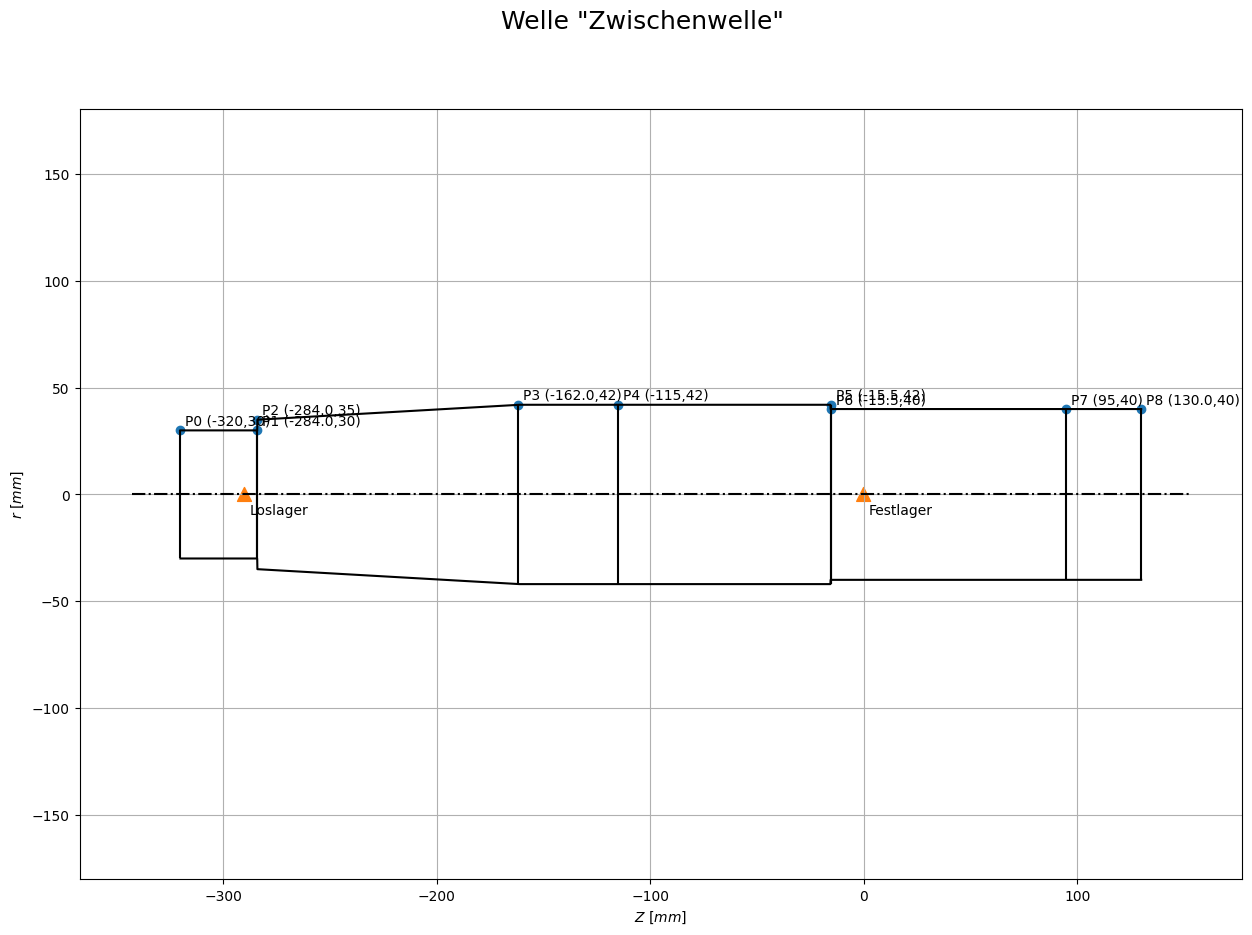

In [15]:
Zwischenwelle.welle_darstellen()

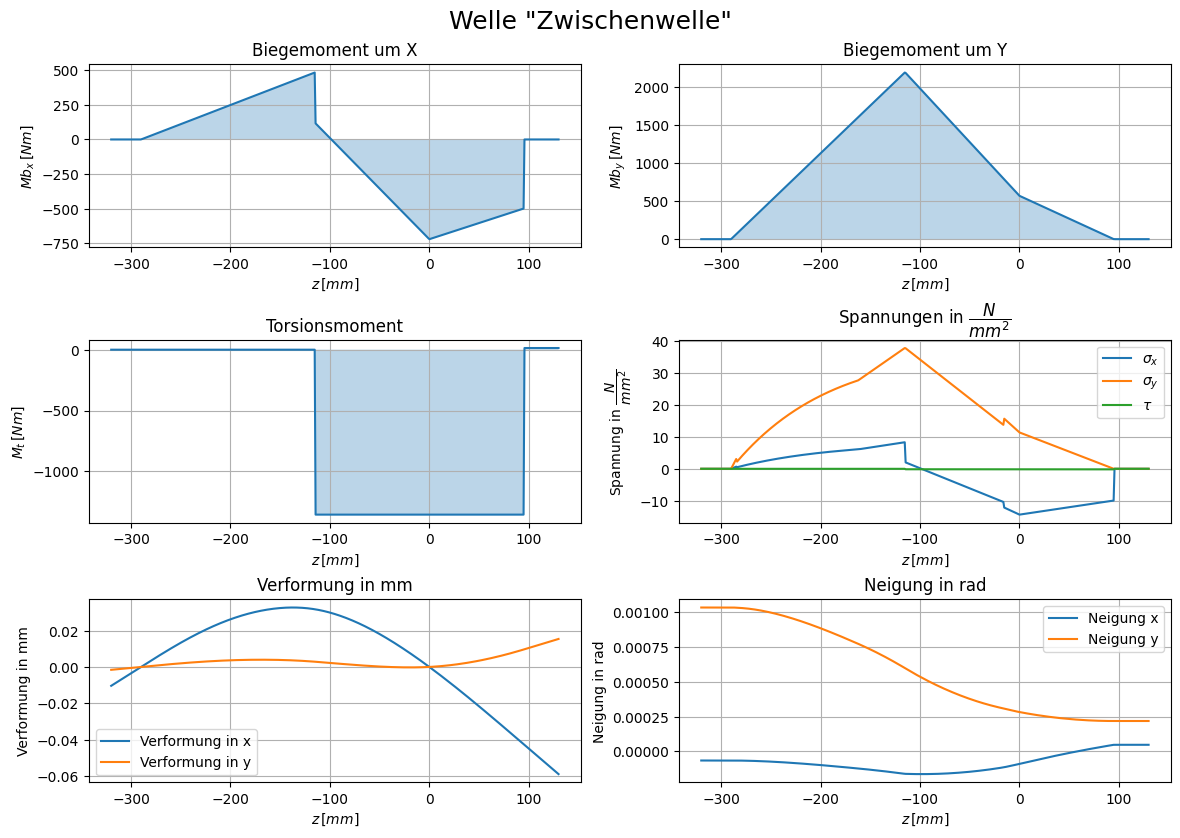

In [16]:
Zwischenwelle.plots_alles()

### Absätze

In [17]:
z_pos_Absätze = [geometrie[1][0],geometrie[6][0]]
z_pos_Pressverbände = [geometrie[4][0],geometrie[7][0]]
Absätze = [Welle_Absatz(Zwischenwelle,z,"Absatz",20,2) for z in z_pos_Absätze]+[Welle_Absatz(Zwischenwelle,z,"Pressverbindung",20) for z in z_pos_Pressverbände]
Absätze

[Absatz bei -284.0,
 Absatz bei -15.5,
 Pressverbindung bei -115,
 Pressverbindung bei 95]

In [18]:
print("\tS_F\tS_D")
for i,Absatz in enumerate(Absätze):
    Sf,Sd = Absatz.Sicherheiten()[:2]
    print(i,Sf,Sd,sep="\t")

	S_F	S_D
0	255.039	46.344
1	49.964	10.533
2	23.175	3.433
3	91.343	13.52


### Lager

In [19]:
Zwischenwelle.print_Lagerkräfte()



Lagerkraefte der Welle "Zwischenwelle"

------------------------------------------------
|       Fx    |    Fy    |    Fz    |    z     |
------------------------------------------------
|0: -8134.966 |    0     |    0     |    0     |
------------------------------------------------
|1:     0     |-9638.978 |    0     |    0     |
------------------------------------------------
|2:     0     |    0     |   4971   |    0     |
------------------------------------------------
|3: -12571.034|    0     |    0     |   -290   |
------------------------------------------------
|4:     0     |-2764.022 |    0     |   -290   |
------------------------------------------------


#### Lager A - Festlager

In [20]:
ID_A = 302
Fr_A = np.sqrt(24121.8**2+9638.978**2)/1000 # in kN
LagerA = Rillenkugellager("Festlager A",ID_A,252.6,Fr_A,4.971,Öl,70,0.6)
print("Erweiterte Lebensdauer [h]: ",LagerA.erweiterte_Lebensdauer_in_Stunden())

Erweiterte Lebensdauer [h]:  7253.21100707639


In [21]:
LagerA.Kurzzeichen

'6408'

#### Lager B - Loslager

In [22]:
ID_B = 376
Fr_B = np.sqrt(8626**2+2764**2)/1000 # in kN
LagerB = Rillenkugellager("Loslager B",ID_B,252.6,Fr_B,0,Öl,70,0.6)
print("Erweiterte Lebensdauer [h]: ",LagerB.erweiterte_Lebensdauer_in_Stunden())

Erweiterte Lebensdauer [h]:  16478.76996878527


In [23]:
LagerB.Kurzzeichen

'16012'

## Abtriebswelle

In [24]:
l_AB = 370
l_z3 = 110

Festlager = 0
Loslager  = -l_AB
B_fl = 24
B_ll = 11
B_Zahnrad = 80


geometrie = (
    (-l_AB-80,30),
    (-l_AB+B_ll/2,30),
    (-l_AB+B_ll/2,37),
    (-l_z3,37), # Rad
    (-l_z3+B_Zahnrad/2+5,37),
    (-l_z3+B_Zahnrad/2+5,35),
    (B_fl/2+3,35),
)

Abtriebswelle = Welle("Abtriebswelle",Festlager,Loslager,"42CrMo4","nein")
Abtriebswelle.set_geometrie(geometrie)

# z22
Abtriebswelle.set_Kraft(25131,"t",-l_z3,-213.785,0)
Abtriebswelle.set_Kraft(-9469,"r",-l_z3,-213.785,0)
Abtriebswelle.set_Kraft(6734,"a",-l_z3,-213.785,0)


Abtriebswelle.lagerkräfte_berechnen()
Abtriebswelle.verformung_berechnen()
print("Neigung FLx: ",np.rad2deg(Abtriebswelle.NeigungFLx))
print("Neigung FLy: ",np.rad2deg(Abtriebswelle.NeigungFLy))
print("Neigung LLx: ",np.rad2deg(Abtriebswelle.NeigungLLx))
print("Neigung LLy: ",np.rad2deg(Abtriebswelle.NeigungLLy))
print("\nMaximaler Verformungsgradient in X: ",Abtriebswelle.maxVerf_x_PM)
print("Maximaler Verformungsgradient in Y: ",Abtriebswelle.maxVerf_y_PM)
print("Maximale Verformung Ges: ",Abtriebswelle.maxVerfPM_ges)

Neigung FLx:  0.0008931175514009467
Neigung FLy:  0.023102216170225457
Neigung LLx:  -0.005215988264785657
Neigung LLy:  0.09146309201805655

Maximaler Verformungsgradient in X:  0.18670092100071084
Maximaler Verformungsgradient in Y:  0.005116798697417159
Maximale Verformung Ges:  0.18672051984673035


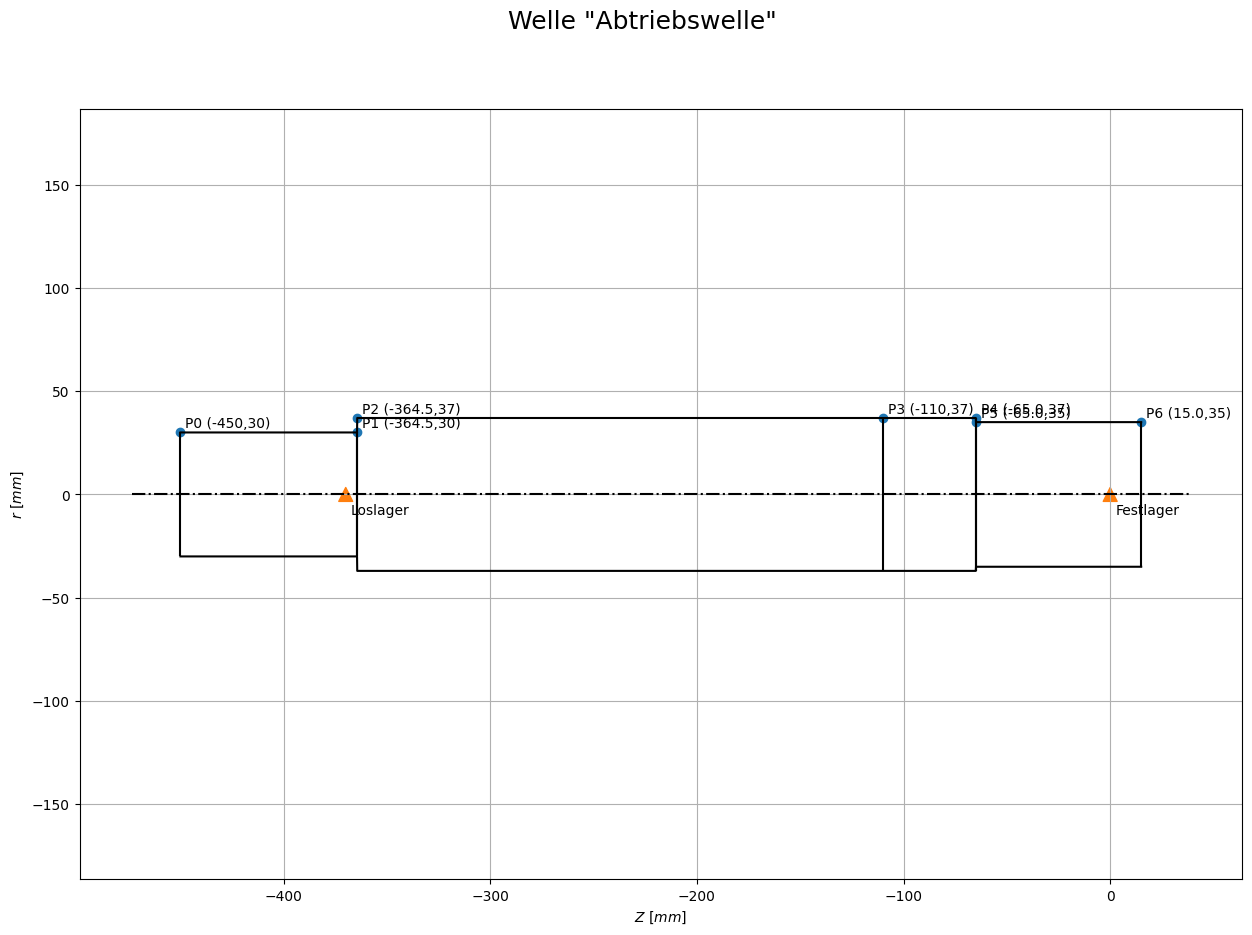

In [25]:
Abtriebswelle.welle_darstellen()

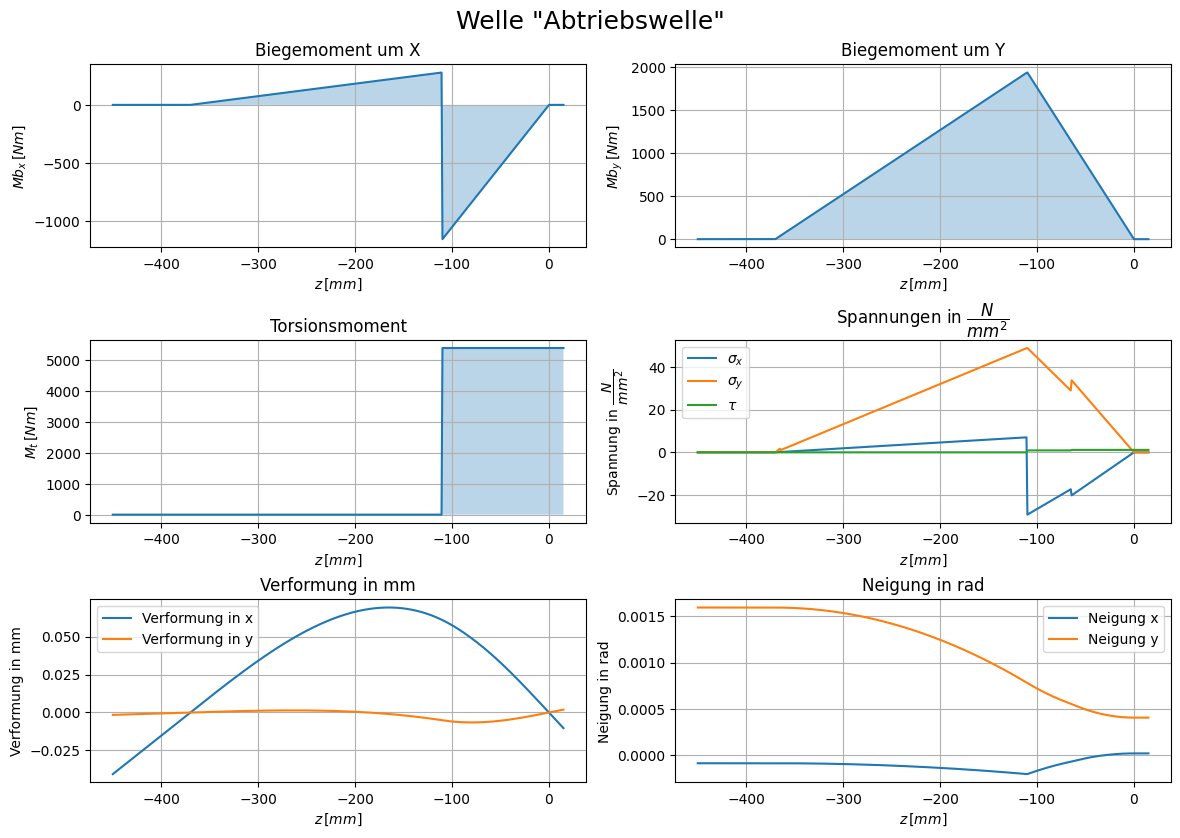

In [26]:
Abtriebswelle.plots_alles()

### Absätze

In [27]:
z_pos_Absätze = [geometrie[1][0],geometrie[5][0]]
z_pos_Pressverbände = [geometrie[3][0]]
Absätze = [Welle_Absatz(Abtriebswelle,z,"Absatz",20,2) for z in z_pos_Absätze]+[Welle_Absatz(Abtriebswelle,z,"Pressverbindung",20) for z in z_pos_Pressverbände]
Absätze

[Absatz bei -364.5, Absatz bei -65.0, Pressverbindung bei -110]

In [28]:
print("\tS_F\tS_D")
for i,Absatz in enumerate(Absätze):
    Sf,Sd = Absatz.Sicherheiten()[:2]
    print(i,Sf,Sd,sep="\t")

	S_F	S_D
0	469.585	83.179
1	26.081	5.558
2	18.624	2.754


### Lager

In [29]:
Abtriebswelle.print_Lagerkräfte()



Lagerkraefte der Welle "Abtriebswelle"

------------------------------------------------
|       Fx    |    Fy    |    Fz    |    z     |
------------------------------------------------
|0: -17659.622|    0     |    0     |    0     |
------------------------------------------------
|1:     0     |10544.779 |    0     |    0     |
------------------------------------------------
|2:     0     |    0     |  -6734   |    0     |
------------------------------------------------
|3: -7471.378 |    0     |    0     |   -370   |
------------------------------------------------
|4:     0     |-1075.779 |    0     |   -370   |
------------------------------------------------


#### Lager A - Festlager

In [30]:
ID_A = 425
Fr_A = np.sqrt(17660**2+10545**2)/1000 # in kN
LagerA = Rillenkugellager("Festlager A",ID_A,60,Fr_A,6.734,Öl,70,0.6)
print("Erweiterte Lebensdauer [h]: ",LagerA.erweiterte_Lebensdauer_in_Stunden())

Erweiterte Lebensdauer [h]:  15846.226854777358


In [31]:
LagerA.Kurzzeichen

'6214 M'

#### Lager B - Loslager

In [32]:
ID_B = 376
Fr_B = np.sqrt(7471**2+1076**2)/1000 # in kN
LagerB = Rillenkugellager("Loslager B",ID_B,60,Fr_B,0,Öl,70,0.6)
print("Erweiterte Lebensdauer [h]: ",LagerB.erweiterte_Lebensdauer_in_Stunden())

Erweiterte Lebensdauer [h]:  25732.538309644282


In [33]:
LagerB.Kurzzeichen

'16012'

In [34]:
wellen = (Antriebswelle,Zwischenwelle,Abtriebswelle)

In [35]:
Zwischenwelle.print_Lagerkräfte()



Lagerkraefte der Welle "Zwischenwelle"

------------------------------------------------
|       Fx    |    Fy    |    Fz    |    z     |
------------------------------------------------
|0: -8134.966 |    0     |    0     |    0     |
------------------------------------------------
|1:     0     |-9638.978 |    0     |    0     |
------------------------------------------------
|2:     0     |    0     |   4971   |    0     |
------------------------------------------------
|3: -12571.034|    0     |    0     |   -290   |
------------------------------------------------
|4:     0     |-2764.022 |    0     |   -290   |
------------------------------------------------
